In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.3.4     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
regions <- c("promoter", "protein_coding", "tf_binding_site", "utr3")

In [3]:
set <- c("old_protein_coding", paste0("subset_", regions), paste0("uniform_subset_", regions))

In [5]:
trajs <- lapply(set, function(s) {
    files <- list.files(path="data/simulations/subset", pattern=paste0("^", s, "*"), full.names=TRUE)
    lapply(seq_along(files), function(i) {
        suppressMessages(read_tsv(files[i])) %>% mutate(rep=files[i], sim=s, recmap=ifelse(str_detect(s, "unif|old"), "unif", "real"))
    }) %>% bind_rows
}) %>% bind_rows %>%
    group_by(sim, gen, recmap) %>% summarise(nea_mean=mean(mean), nea_sd=mean(sd)) %>%
    ungroup

Warning message:
“Removed 3 rows containing missing values (geom_path).”

Warning message:
“Removed 2 rows containing missing values (geom_path).”

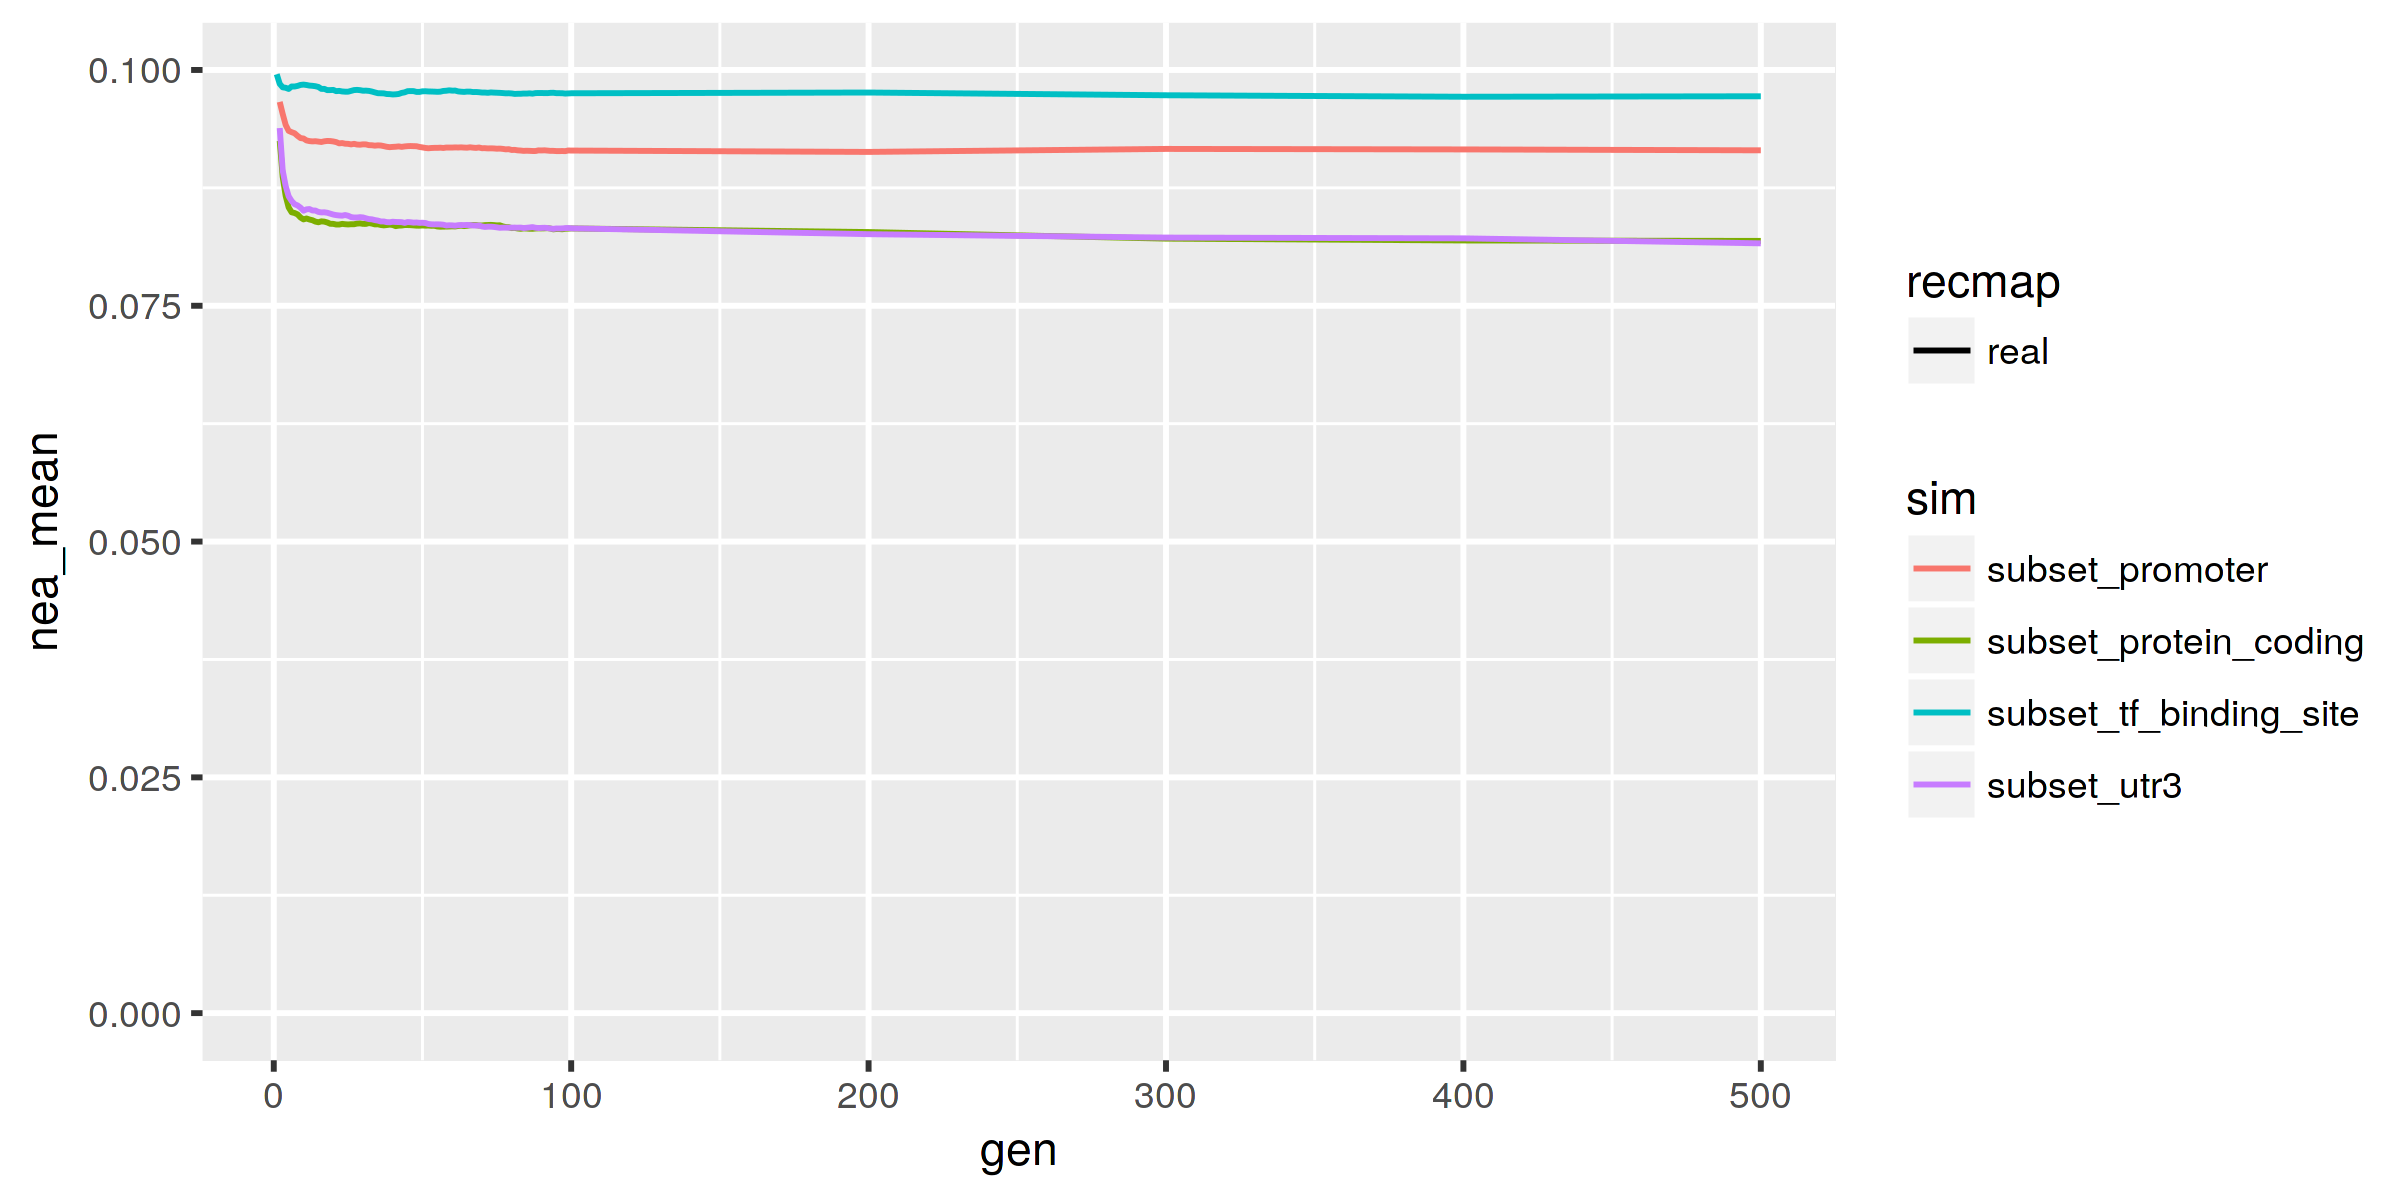

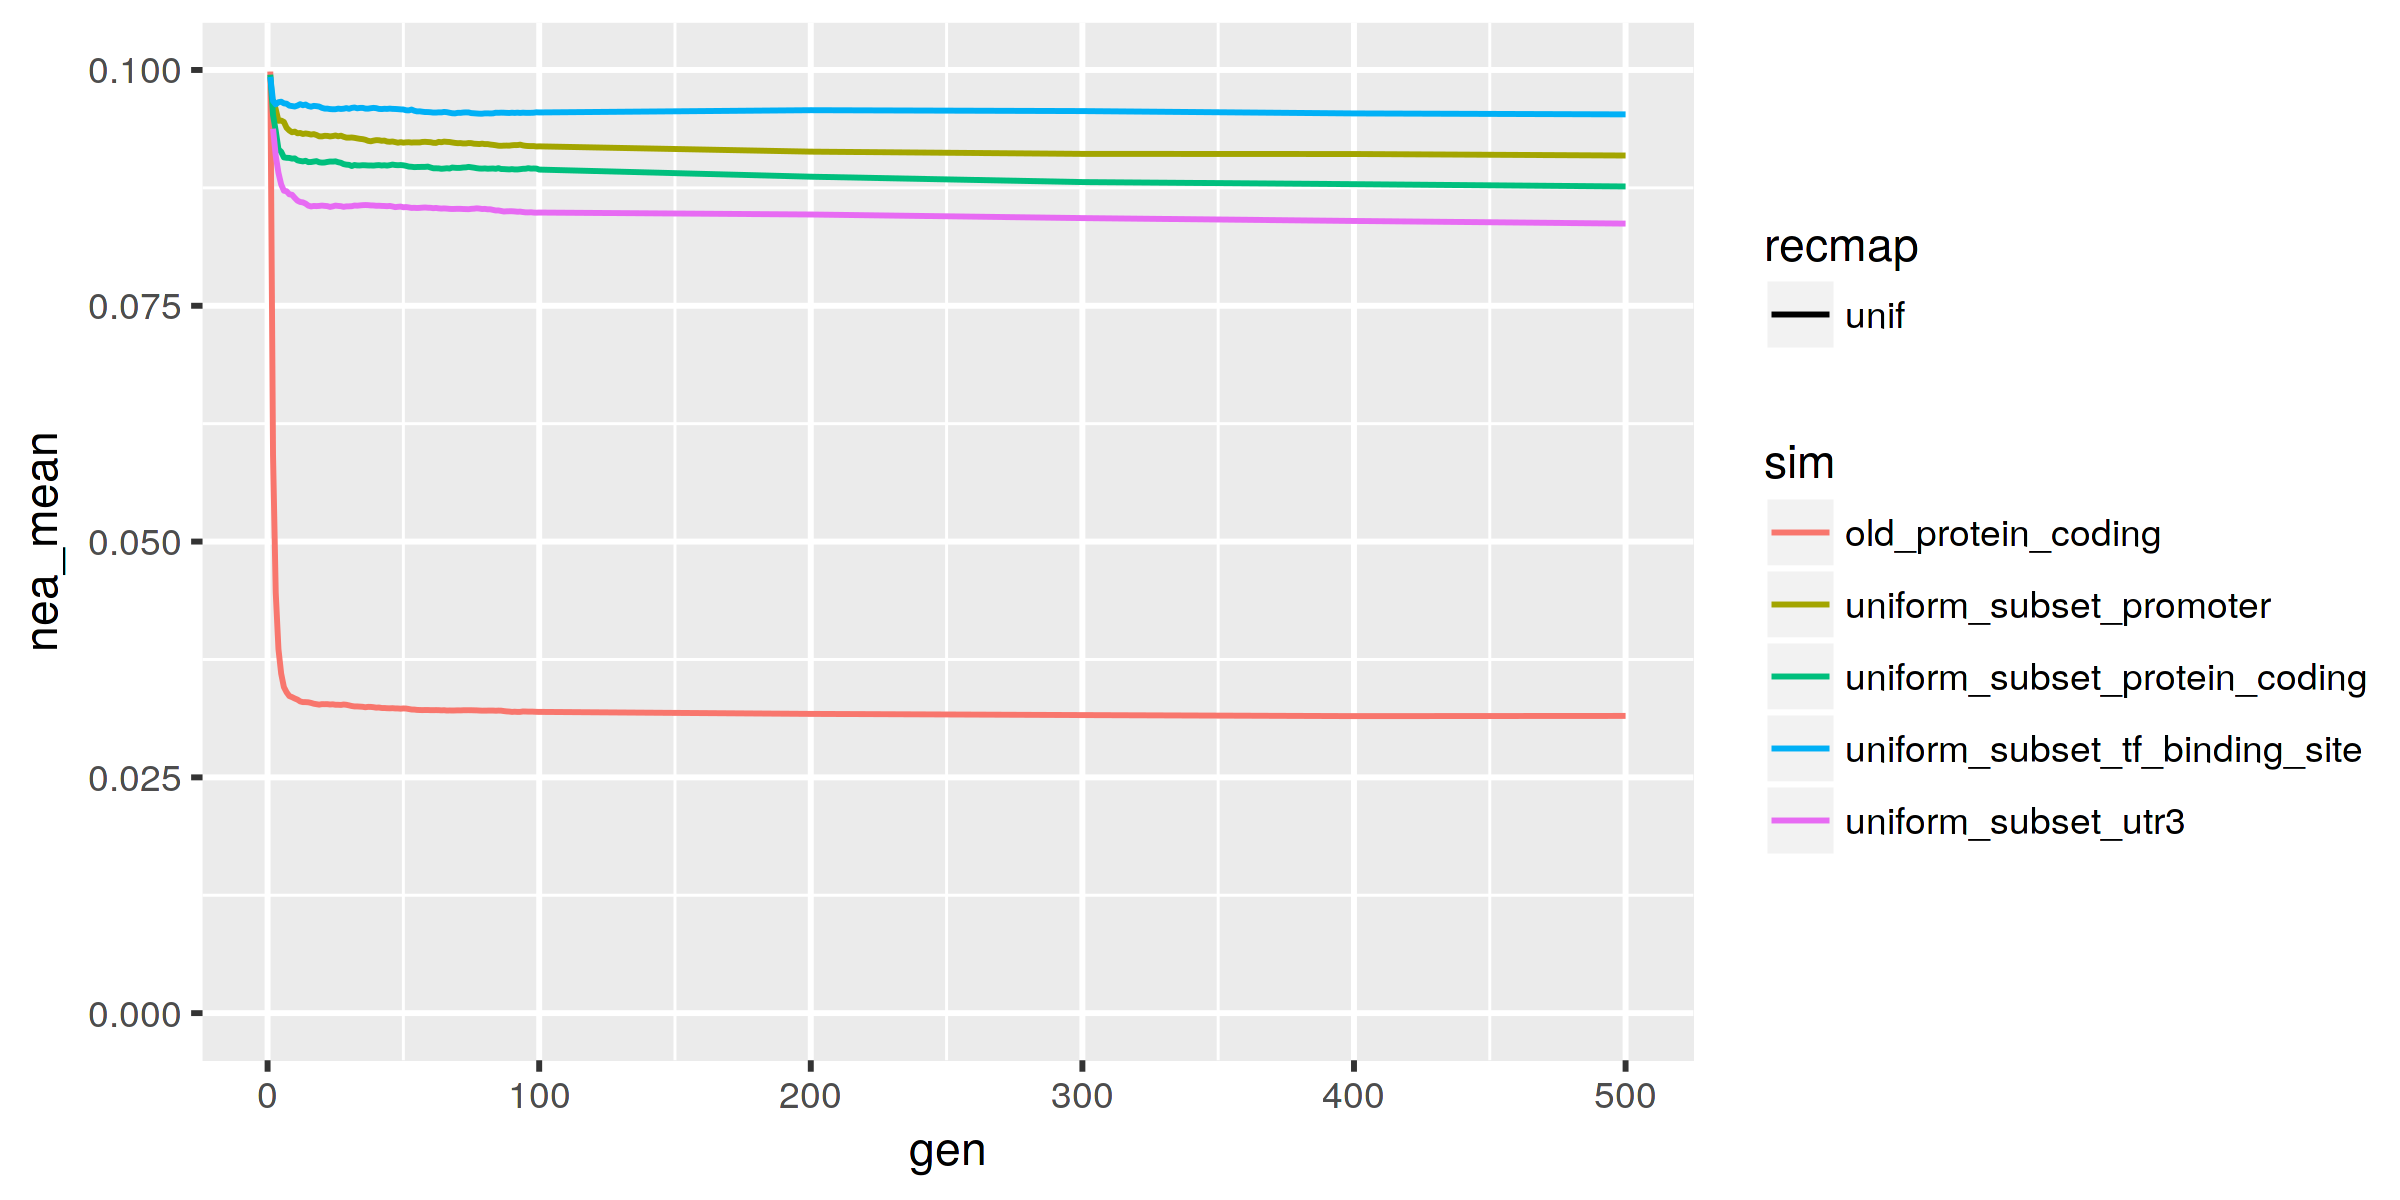

In [7]:
options(repr.plot.width=8, repr.plot.height=4, repr.plot.res=300)

ggplot(filter(trajs, recmap == "real"), aes(gen, nea_mean, color=sim, group=sim, linetype=recmap)) + geom_line() + ylim(0, 0.1)
ggplot(filter(trajs, recmap == "unif"), aes(gen, nea_mean, color=sim, group=sim, linetype=recmap)) + geom_line() + ylim(0, 0.1)


#ggplot(trajs, aes(gen, nea_mean, color=sim, group=sim, linetype=recmap)) + geom_line() + scale_x_log10() + ylim(0, 0.1)

In [8]:
suppressMessages(recmaps <- lapply(c("protein_coding", "utr5", "utr3", "tss_5k", "ctcf_binding_site", 
"enhancer", "open_chromatin", "promoter", "promoter_flank", "tf_binding_site", 
"priPhastCons"), function(reg) {
    read_tsv(paste0("data/bed/regions/", reg, "_regions_gap_sites_spacers_recomb_rates.bed"),
            col_names=c("chrom", "start", "end", "type", "width", "length", "recomb_rate", "xxx")) %>% mutate(region=reg)
}) %>% bind_rows)

In [30]:
x <- filter(recmaps, type == "original", end - start > 1) %>%
    group_by(region) %>%
    summarise(mean_rec=mean(recomb_rate), median_rec=median(recomb_rate)) %>%
    arrange(median_rec)
x

region,mean_rec,median_rec
utr3,1.064592,0.2030530
protein_coding,1.191696,0.2137490
utr5,1.342761,0.2560120
priPhastCons,1.421830,0.2670770
promoter,1.254918,0.3026190
open_chromatin,1.588662,0.3281261
tss_5k,1.361289,0.3371095
enhancer,1.706395,0.3819081
tf_binding_site,1.887584,0.4416216
promoter_flank,1.894144,0.4488152


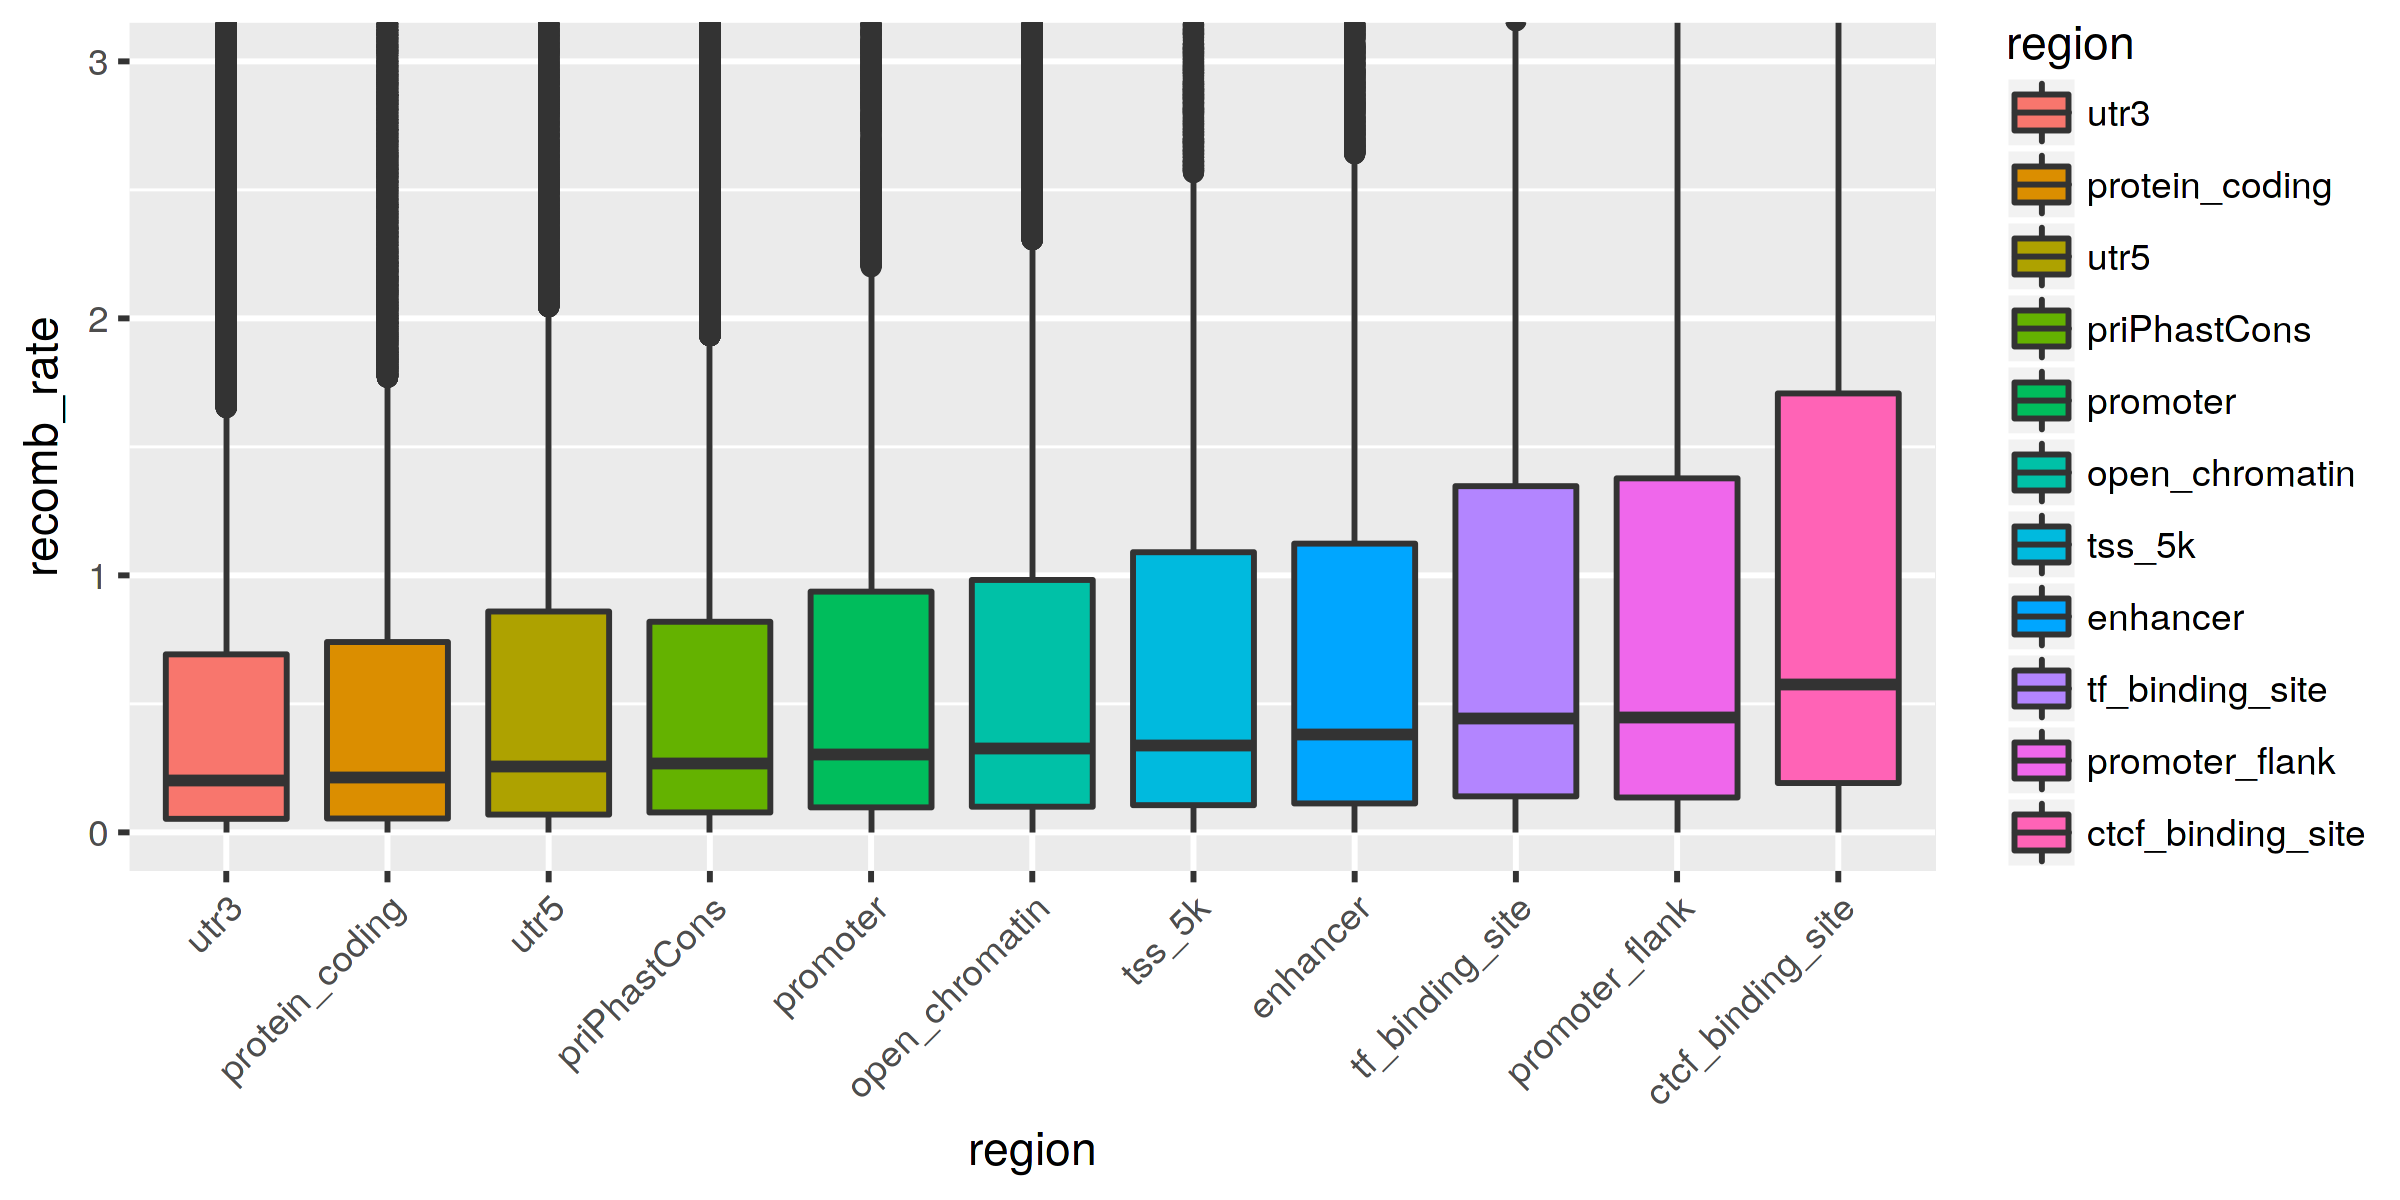

In [33]:
mutate(recmaps, region=factor(region, levels=x$region)) %>%
filter(type == "original", end - start > 1) %>%
ggplot(aes(region, recomb_rate, fill=region), alpha=1/2) + geom_boxplot() + coord_cartesian(ylim=c(0, 3)) + theme(axis.text.x=element_text(hjust=1, angle=45))

In [84]:
tf <- lapply(list.files(path="data/simulations/", pattern="^subset_tf_binding_site_h_0.5_rep_*", full.names=TRUE), function(f) {suppressMessages(read_tsv(f)) %>% mutate(rep=f) }) %>% bind_rows

In [85]:
old <- lapply(list.files(path="data/simulations/", pattern="^old_protein_coding_0.5_rep_*", full.names=TRUE), function(f) {suppressMessages(read_tsv(f)) %>% mutate(rep=f) }) %>% bind_rows

In [94]:
options(repr.plot.width=6, repr.plot.height=4, repr.plot.res=300)

traj <- bind_rows(
    select(tf, gen, mean, rep) %>% group_by(gen) %>% summarise(new=mean(mean, na.rm=TRUE)),
    select(old, gen, mean, rep) %>% group_by(gen) %>% summarise(old=mean(mean, na.rm=TRUE))
) %>%
    gather(sim, nea, -gen)

Warning message:
“Removed 244 rows containing missing values (geom_point).”

Warning message:
“Removed 244 rows containing missing values (geom_point).”

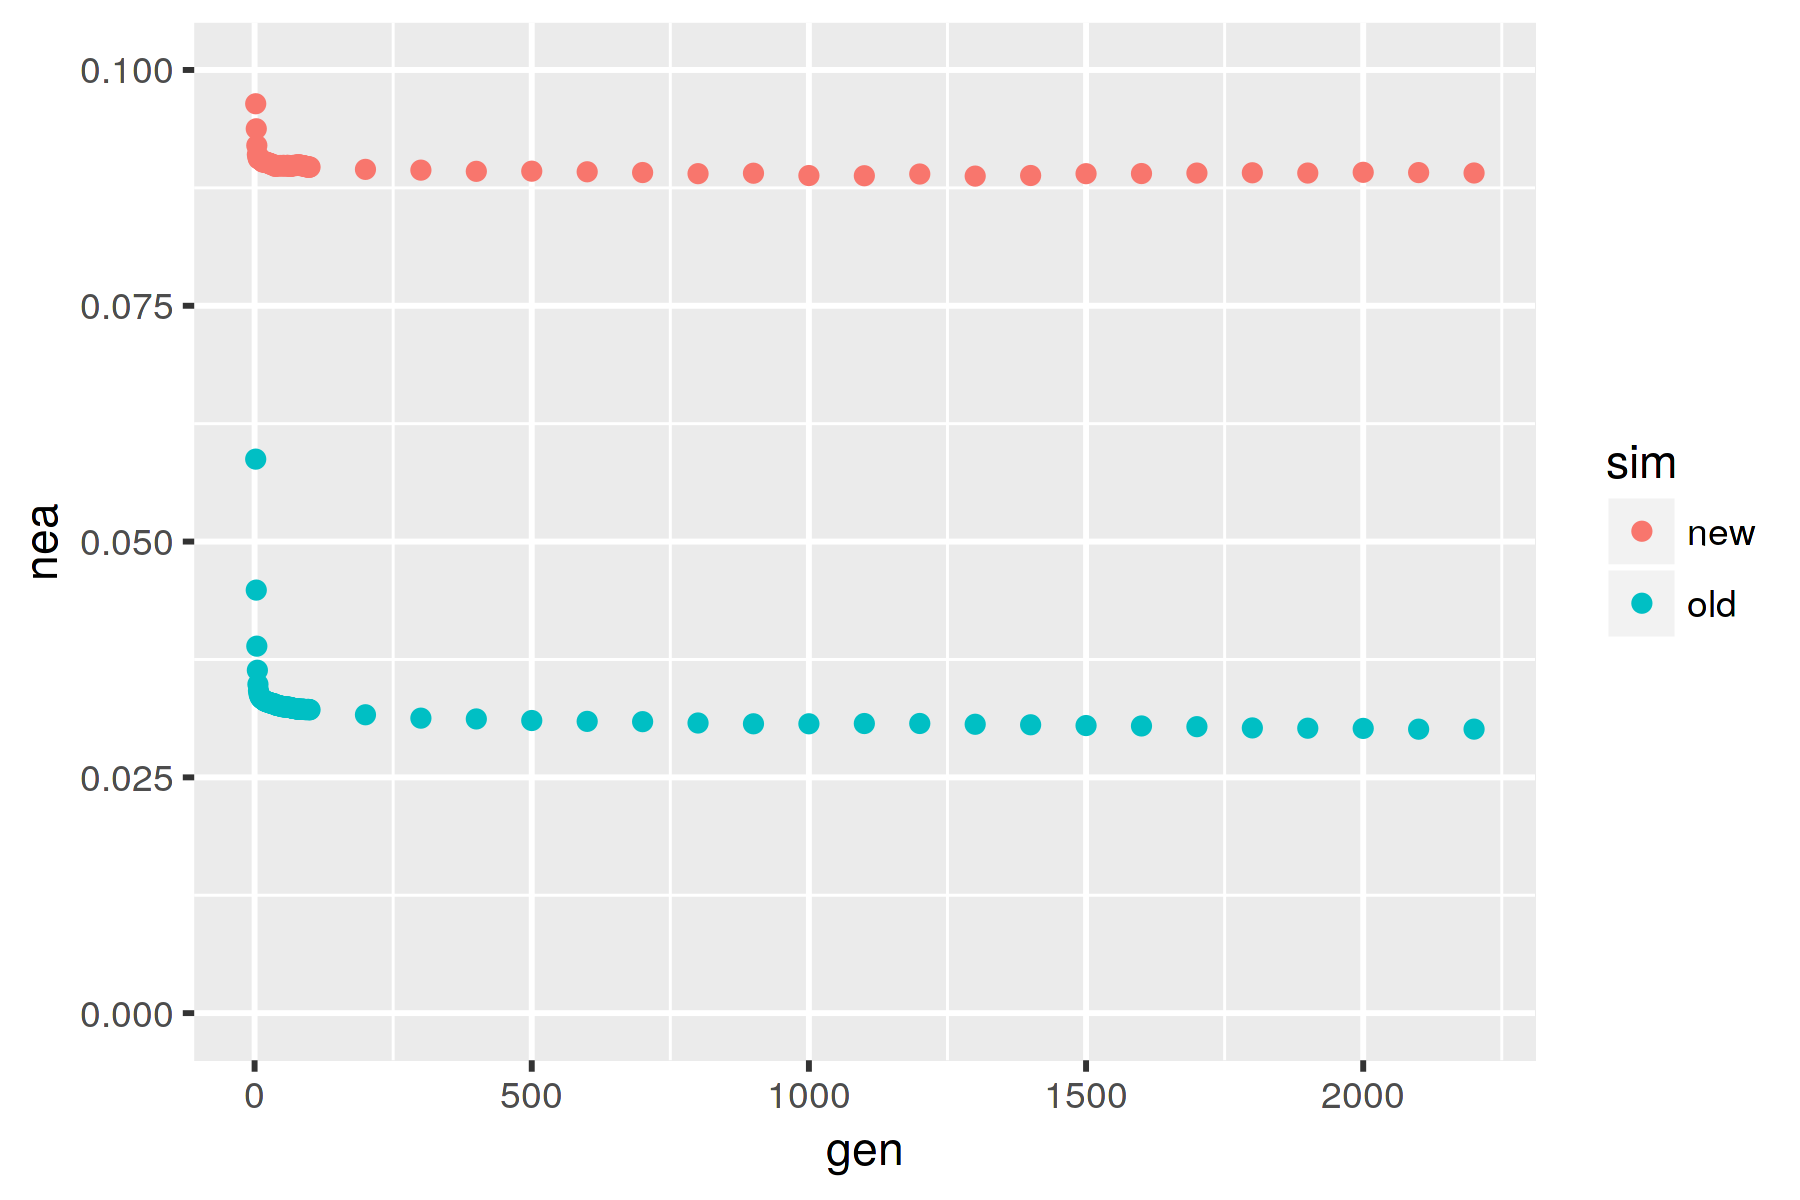

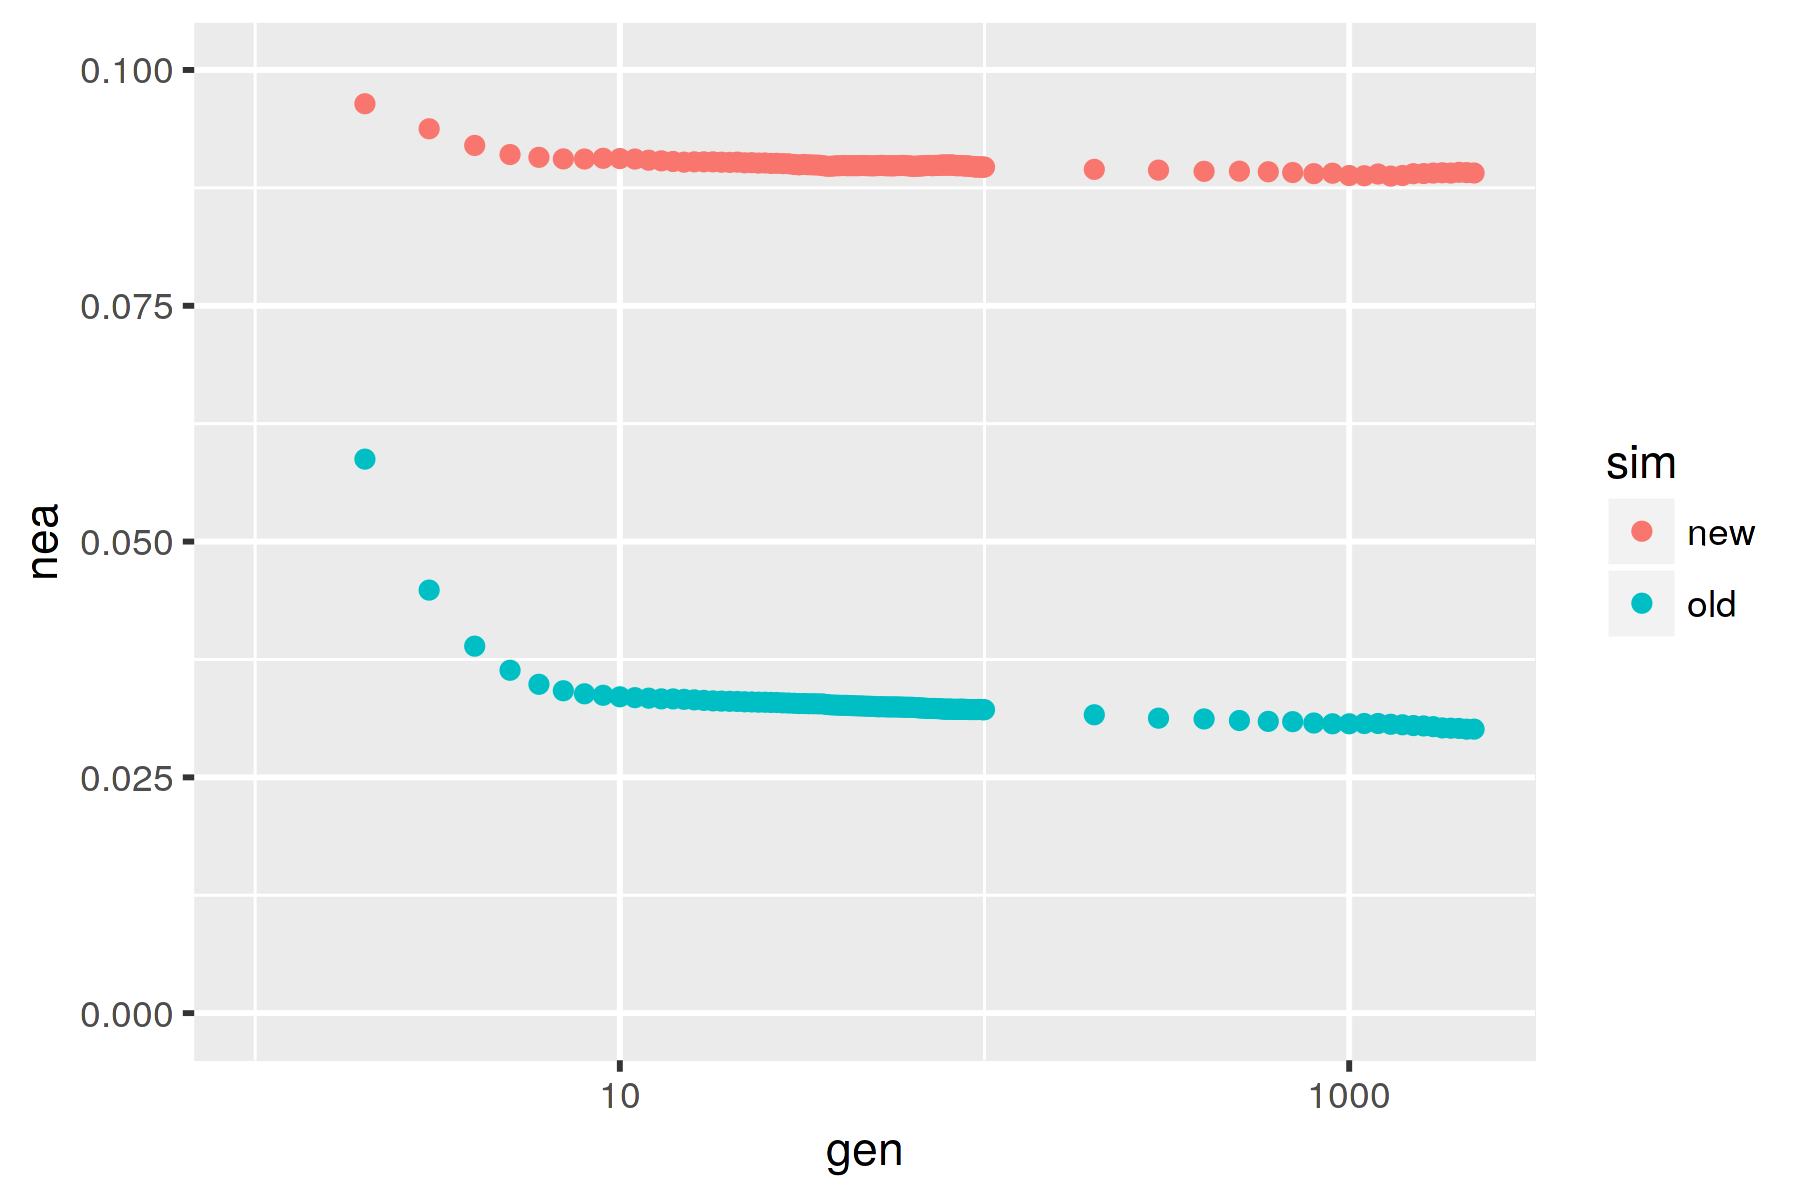

In [97]:
ggplot(traj, aes(gen, nea, color=sim, group=sim)) + geom_point() + ylim(0, 0.1)
ggplot(traj, aes(gen, nea, color=sim, group=sim)) + geom_point() + scale_x_log10() + ylim(0, 0.1)

Warning message:
“Removed 1452 rows containing missing values (geom_point).”

Warning message:
“Removed 1452 rows containing missing values (geom_point).”

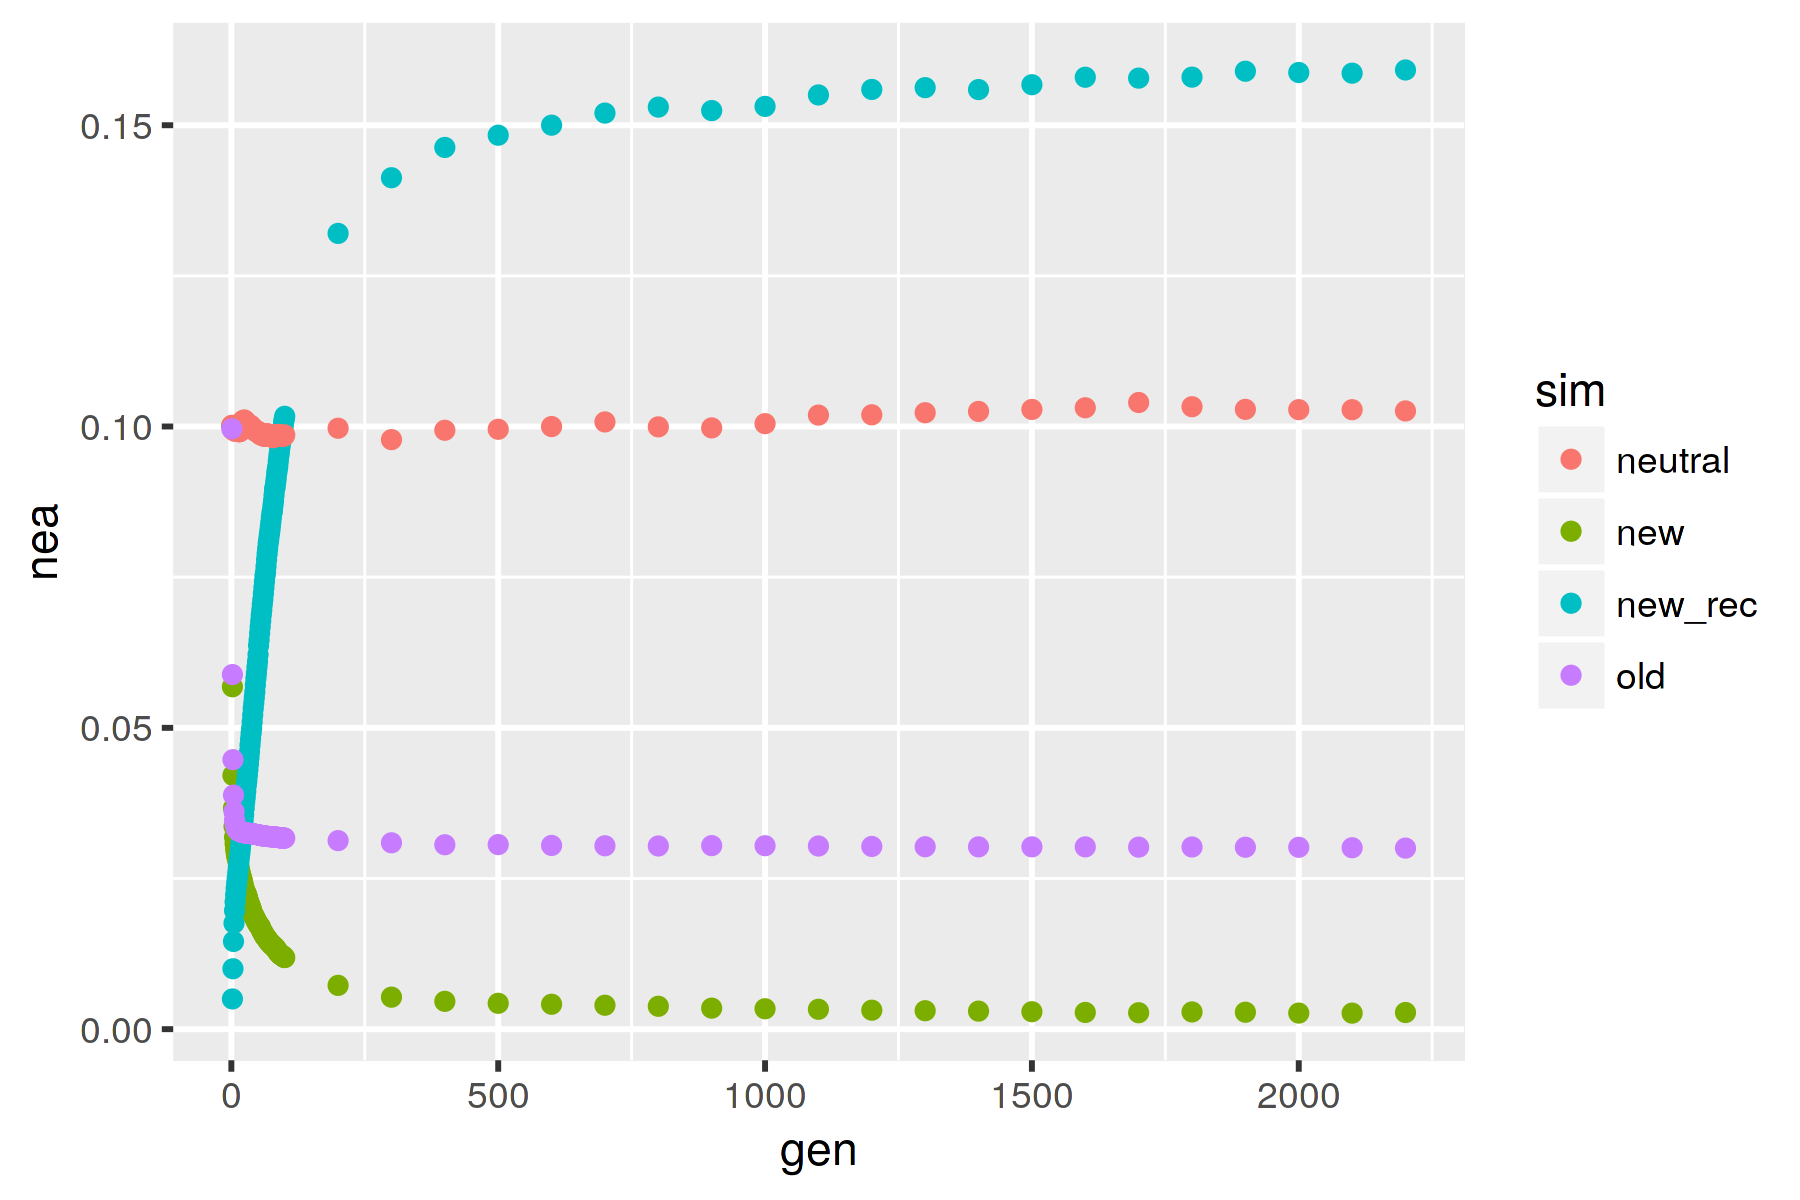

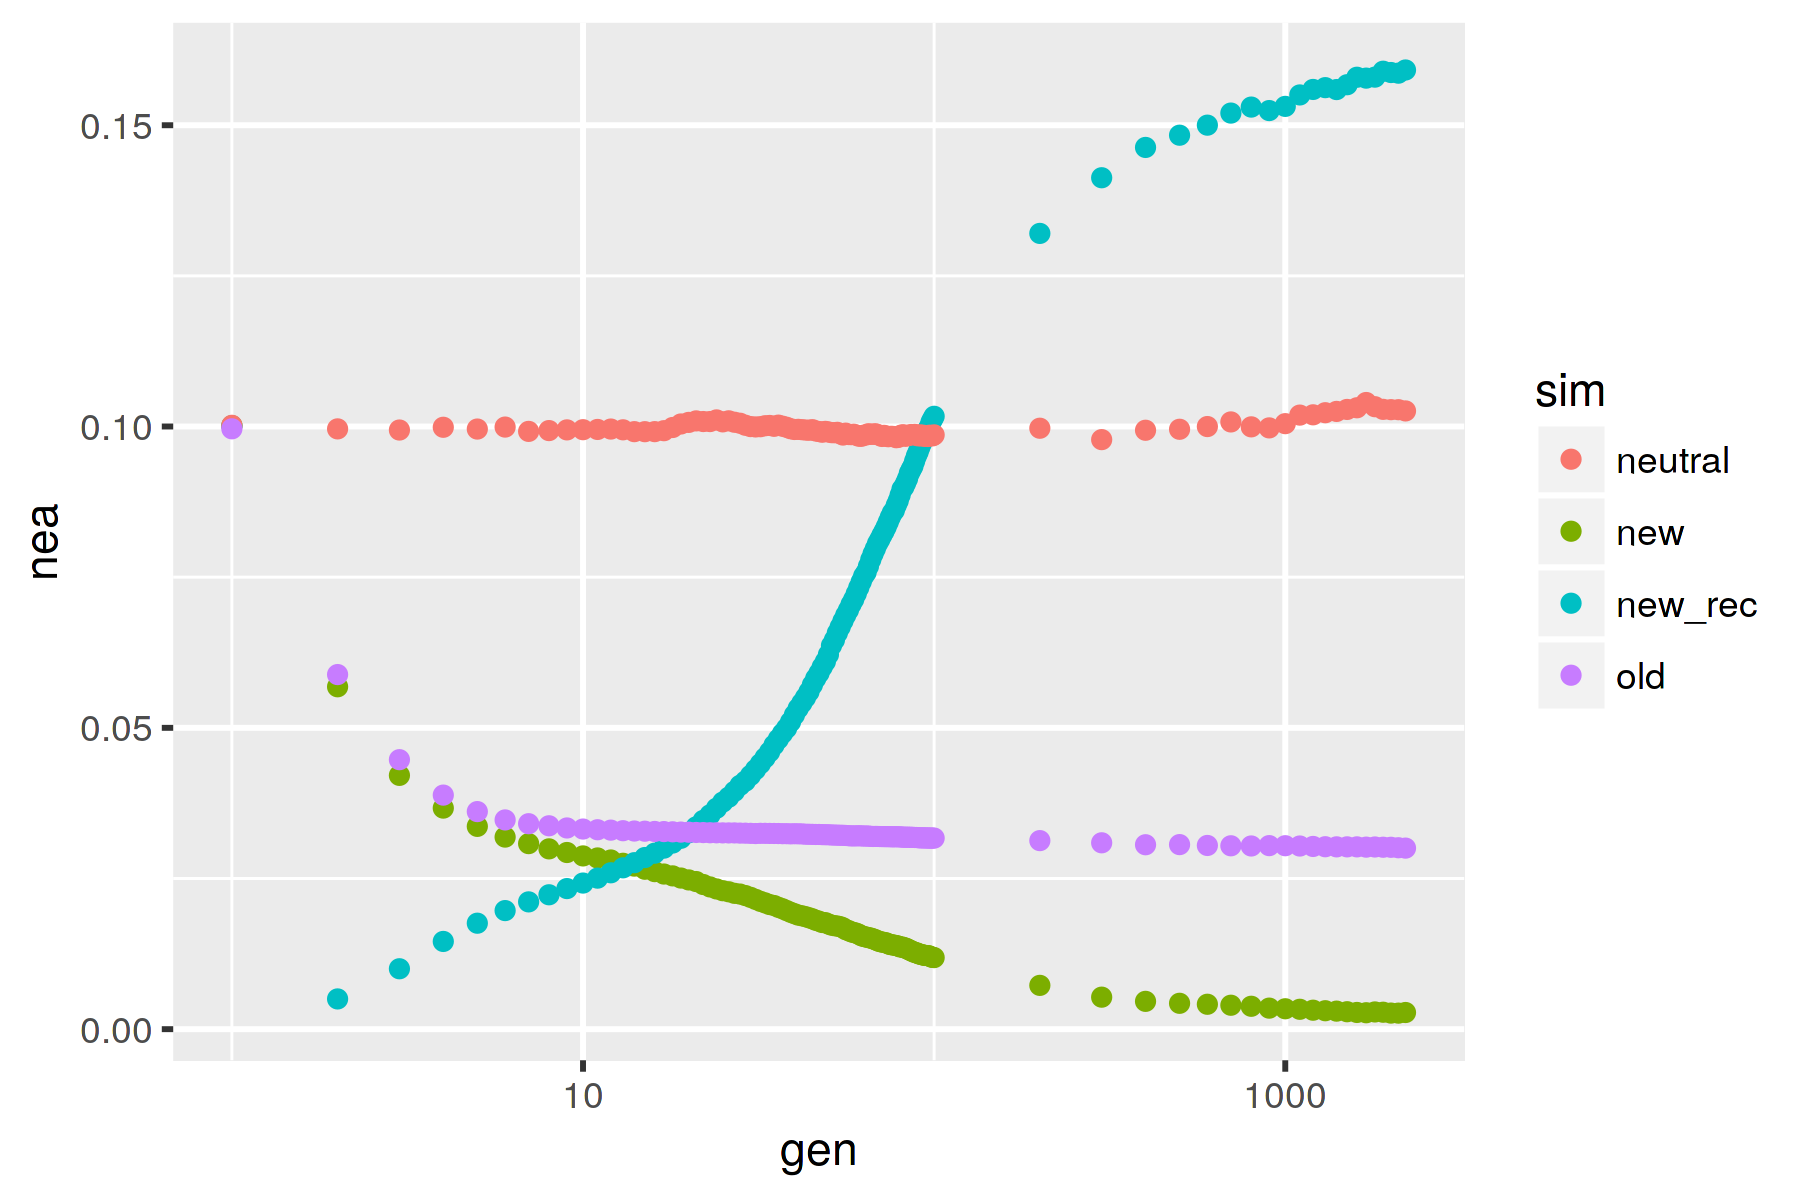

In [82]:
ggplot(traj, aes(gen, nea, color=sim, group=sim)) + geom_point()
ggplot(traj, aes(gen, nea, color=sim, group=sim)) + geom_point() + scale_x_log10()